<a href="https://colab.research.google.com/github/aidtaleb/Data-science-/blob/master/predicting_house_prices_kaggle_competetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Prediction of house prices using deep learning- Kaggle competetion bold text***

In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
# crate a direction of kaggle 
! mkdir ~/.kaggle/

In [3]:
# copy kaggle.json in kaggle file
! cp '/content/drive/My Drive/Kaggle/kaggle.json'  ~/.kaggle/

In [4]:
# give all rights to  kaggle.json 
! chmod 600  ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.6MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 58.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.5MB/s]


In [213]:
import pandas as pd 
data_train=pd.read_csv('/content/train.csv')
data_test=pd.read_csv('/content/test.csv')

In [214]:
# checking for messing values : 
data_train.isnull().any().sum()

19

In [250]:
df=data_train.drop(['GarageYrBlt','Id','EnclosedPorch','MoSold',	'YrSold','MSSubClass','BsmtFinSF2','GarageCars','LowQualFinSF','YearBuilt',	'YearRemodAdd','BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr',	'TotRmsAbvGrd','Fireplaces','OverallQual',	'OverallCond','3SsnPorch',	'ScreenPorch',	'PoolArea',	'MiscVal','SaleType',	'SaleCondition','PoolQC',	'Fence',	'MiscFeature','GarageCond',	'PavedDrive','GarageQual','GarageFinish','GarageType','FireplaceQu','Functional','KitchenQual','Heating',	'HeatingQC',	'CentralAir',	'Electrical',	'BsmtFinType2','ExterQual',	'ExterCond',	'Foundation',	'BsmtQual',	'BsmtCond',	'BsmtExposure',	'BsmtFinType1',	'RoofStyle',	'RoofMatl',	'Exterior1st'	,'Exterior2nd'	,'MasVnrType','BldgType','HouseStyle','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2'], axis=1)

In [251]:
# normalize a data frame 
dataf=((df-df.min())/(df.max()-df.min()))*1

In [252]:
dataf.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0.150685,0.033420,0.12250,0.125089,0.064212,0.140098,0.119780,0.413559,0.259231,0.386460,0.000000,0.111517,0.241078
1,0.202055,0.038795,0.00000,0.173281,0.121575,0.206547,0.212942,0.000000,0.174830,0.324401,0.347725,0.000000,0.203583
2,0.160959,0.046507,0.10125,0.086109,0.185788,0.150573,0.134465,0.419370,0.273549,0.428773,0.000000,0.076782,0.261908
3,0.133562,0.038561,0.00000,0.038271,0.231164,0.123732,0.143873,0.366102,0.260550,0.452750,0.000000,0.063985,0.145952
4,0.215753,0.060576,0.21875,0.116052,0.209760,0.187398,0.186095,0.509927,0.351168,0.589563,0.224037,0.153565,0.298709


In [254]:
df=df.fillna(1)

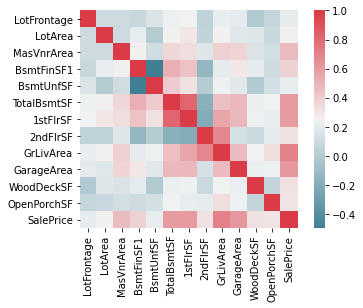

In [255]:
import seaborn as sns
import numpy as np
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [257]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [263]:

def create_mlp(dim, regress=True):
  # define our MLP network 
  model = Sequential() 
  model.add(Dense(25, input_dim=dim, activation="relu",kernel_initializer='glorot_uniform')) 
  model.add(Dense(7,activation="linear"))
  model.add(Dense(3, activation="linear"))
  model.add(Dense(1, activation="linear"))
	# return our mode
  return model

In [264]:
(train, test) = train_test_split(df, test_size=0.2, random_state=42)
maxPrice = train["SalePrice"].max()
trainY = train["SalePrice"] / maxPrice
testY = test["SalePrice"] / maxPrice
from keras.optimizers import SGD

In [265]:
model = create_mlp(X_train.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 1000)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 25)                325       
_________________________________________________________________
dense_127 (Dense)            (None, 7)                 182       
_________________________________________________________________
dense_128 (Dense)            (None, 3)                 24        
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 4         
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________


In [266]:

model.fit(x=X_train, y=y_train, 
	validation_data=(X_test, y_test),
	epochs=1000, batch_size=8)

Epoch 1/1000
146/146 [==============================] - 0s 2ms/step - loss: 88.0172 - val_loss: 61.9105
Epoch 2/1000
146/146 [==============================] - 0s 1ms/step - loss: 34.5526 - val_loss: 30.4655
Epoch 3/1000
146/146 [==============================] - 0s 1ms/step - loss: 26.5194 - val_loss: 27.8819
Epoch 4/1000
146/146 [==============================] - 0s 1ms/step - loss: 24.2376 - val_loss: 25.0073
Epoch 5/1000
146/146 [==============================] - 0s 1ms/step - loss: 21.9639 - val_loss: 22.2123
Epoch 6/1000
146/146 [==============================] - 0s 1ms/step - loss: 19.8949 - val_loss: 19.9993
Epoch 7/1000
146/146 [==============================] - 0s 1ms/step - loss: 18.3748 - val_loss: 18.1006
Epoch 8/1000
146/146 [==============================] - 0s 2ms/step - loss: 17.3678 - val_loss: 17.7682
Epoch 9/1000
146/146 [==============================] - 0s 1ms/step - loss: 16.9027 - val_loss: 16.8794
Epoch 10/1000
146/146 [==============================] - 0s 1ms/

In [267]:
dft=data_test.drop(['GarageYrBlt','Id','EnclosedPorch','MoSold',	'YrSold','MSSubClass','BsmtFinSF2','GarageCars','LowQualFinSF','YearBuilt',	'YearRemodAdd','BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr',	'TotRmsAbvGrd','Fireplaces','OverallQual',	'OverallCond','3SsnPorch',	'ScreenPorch',	'PoolArea',	'MiscVal','SaleType',	'SaleCondition','PoolQC',	'Fence',	'MiscFeature','GarageCond',	'PavedDrive','GarageQual','GarageFinish','GarageType','FireplaceQu','Functional','KitchenQual','Heating',	'HeatingQC',	'CentralAir',	'Electrical',	'BsmtFinType2','ExterQual',	'ExterCond',	'Foundation',	'BsmtQual',	'BsmtCond',	'BsmtExposure',	'BsmtFinType1',	'RoofStyle',	'RoofMatl',	'Exterior1st'	,'Exterior2nd'	,'MasVnrType','BldgType','HouseStyle','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2'], axis=1)

In [268]:
x_test=dft.fillna(1)
x_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,11622,0.0,468.0,270.0,882.0,896,0,896,730.0,140,0
1,81.0,14267,108.0,923.0,406.0,1329.0,1329,0,1329,312.0,393,36
2,74.0,13830,0.0,791.0,137.0,928.0,928,701,1629,482.0,212,34
3,78.0,9978,20.0,602.0,324.0,926.0,926,678,1604,470.0,360,36
4,43.0,5005,0.0,263.0,1017.0,1280.0,1280,0,1280,506.0,0,82


In [269]:
print("[INFO] predicting house prices...")
preds = model.predict(x_test)


[INFO] predicting house prices...


In [270]:
data_sub1=pd.DataFrame()

In [271]:
data_sub1['Id']=data_test['Id']
data_sub1['SalePrice']=preds

In [272]:
data_sub1.head()

,Id,SalePrice
0,1461,145309.375000
1,1462,187795.671875
2,1463,192455.765625
3,1464,189966.453125
4,1465,167684.656250


In [273]:
data_sub1.to_csv('/content/sample_data/samplesubmission.csv')